In [50]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from seaborn import heatmap

sys.path.insert(0, '..')
import ccal

%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

In [30]:
from ccal.support import normalize_pandas_object, compare_matrices
from ccal.information import information_coefficient

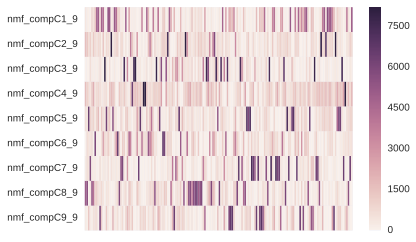

In [89]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
h = h.iloc[:10, :]
heatmap(h,xticklabels=False)

In [84]:
normalized_clipped_h = normalize_pandas_object(normalize_pandas_object(h).clip(-3, 3), method='0-1')
distance_matrix = compare_matrices(normalized_clipped_h, normalized_clipped_h,
                                   information_coefficient, is_distance=True,
                                   report_progress=False)
distance_matrix

<00:01:12> Converting association to distance (1 - association) ...


,nmf_compC1_9,nmf_compC2_9,nmf_compC3_9,nmf_compC4_9,nmf_compC5_9,nmf_compC6_9,nmf_compC7_9,nmf_compC8_9,nmf_compC9_9
nmf_compC1_9,0.032072,1.298138,1.370352,1.367953,1.551778,0.532287,1.406672,1.453495,0.537571
nmf_compC2_9,1.298138,0.011650,1.260251,0.758666,1.414011,0.411324,1.237422,1.469480,1.327732
nmf_compC3_9,1.370352,1.260251,0.096212,0.620920,1.328666,1.276233,1.481612,1.319609,1.332179
nmf_compC4_9,1.367953,0.758666,0.620920,0.017491,1.304243,1.392439,1.228487,0.605836,1.353586
nmf_compC5_9,1.551778,1.414011,1.328666,1.304243,0.011098,1.487850,1.316514,1.469326,1.428205
nmf_compC6_9,0.532287,0.411324,1.276233,1.392439,1.487850,0.010708,1.324500,1.561113,1.391420
nmf_compC7_9,1.406672,1.237422,1.481612,1.228487,1.316514,1.324500,0.087602,1.357500,1.339933
nmf_compC8_9,1.453495,1.469480,1.319609,0.605836,1.469326,1.561113,1.357500,0.011267,1.371298
nmf_compC9_9,0.537571,1.327732,1.332179,1.353586,1.428205,1.391420,1.339933,1.371298,0.039267


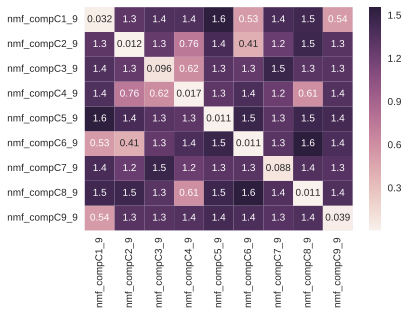

In [81]:
heatmap(distance_matrix, annot=True)

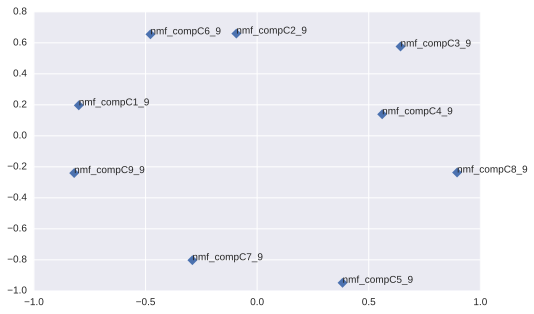

In [82]:
mds = MDS(metric=True, random_state=20121020, dissimilarity='precomputed', n_init=1000, max_iter=1000)
components_coordinates = mds.fit_transform(distance_matrix)

fig = plt.figure(figsize=(8, 5))
plt.gca().plot(components_coordinates[:, 0], components_coordinates[:, 1], marker='D', linestyle='')
for i in range(h.shape[0]):
    x, y = components_coordinates[i, 0], components_coordinates[i, 1]
    fig.gca().text(x, y, h.index[i])

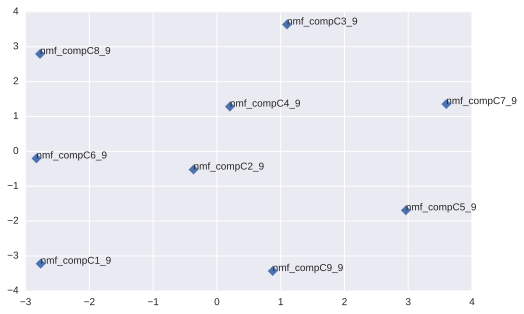

In [83]:
mds = MDS(metric=True, random_state=20121020, n_init=1000, max_iter=1000)
components_coordinates = mds.fit_transform(normalized_clipped_h)

fig = plt.figure(figsize=(8, 5))
plt.gca().plot(components_coordinates[:, 0], components_coordinates[:, 1], marker='D', linestyle='')
for i in range(h.shape[0]):
    x, y = components_coordinates[i, 0], components_coordinates[i, 1]
    fig.gca().text(x, y, h.index[i])